# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import gc
import sys 

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from utils import print_memory_usage, clean_database,  perform_voting_feature_selection
from preprocess import preprocessing
pd.set_option('display.max_columns', None)

preprocessing_dir = os.path.join('figures','preprocessing', 'RF')
db_path = os.path.join('..', 'data', 'datasets', '5G NIDD', 'Combined.csv')

# Data cleaning and splitting

[Preprocessing] Dropping artifact columns: ['Unnamed: 0']
Original shape: (1215890, 51)
Shape after removing duplicates: (1215869, 51)

[Dataset Info] Attack Type Distribution (Counts):
Attack Type
Benign            477716
UDPFlood          457340
HTTPFlood         140812
SlowrateDoS        73124
TCPConnectScan     20052
SYNScan            20043
UDPScan            15906
SYNFlood            9721
ICMPFlood           1155
Name: count, dtype: int64
[Preprocessing] Final feature set (40): ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcGap', 'DstGap', 'Rate', 'SrcRate', 'DstRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']

[Verification] Class distribution (normalized) across splits:
                Original     Train       Val      Test
Attac

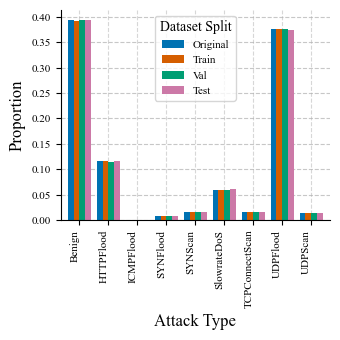

[Memory] Before GC: 1487.58 MB
[Memory] After GC: 1307.73 MB
[Preprocessing] Applying standard scaling...
<class 'pandas.core.frame.DataFrame'>
Index: 972695 entries, 285273 to 583254
Data columns (total 40 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dur         972695 non-null  float32
 1   Mean        972695 non-null  float32
 2   Sum         972695 non-null  float32
 3   Min         972695 non-null  float32
 4   Max         972695 non-null  float32
 5   Proto       972695 non-null  float32
 6   sTos        972695 non-null  float32
 7   dTos        972695 non-null  float32
 8   sDSb        972695 non-null  float32
 9   dDSb        972695 non-null  float32
 10  sTtl        972695 non-null  float32
 11  dTtl        972695 non-null  float32
 12  Cause       972695 non-null  float32
 13  TotPkts     972695 non-null  float32
 14  SrcPkts     972695 non-null  float32
 15  DstPkts     972695 non-null  float32
 16  TotBytes    972695 non

In [2]:
X_train, X_val, X_test, y_train, y_val, y_test, output_encoder = clean_database(db_path, preprocessing_dir, do_scale=True, fix_skewness=False)
# Force garbage collection to clear the large raw dataframe from memory immediately
gc.collect()
print_memory_usage("Notebook - After clean_database")

In [3]:
# Print the number of remaining features
print(f"Remaining features count: {X_train.shape[1]}")

# Print the list of remaining feature names
print("Remaining features list:")
print(X_train.columns.tolist())

Remaining features count: 40
Remaining features list:
['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcGap', 'DstGap', 'Rate', 'SrcRate', 'DstRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']


# Arguments

In [4]:
n_features_list = [35, 30, 25, 20, 15, 10, 5]
sampling_method = 'None'
plot_distributions = True

# The loop


STARTING PIPELINE: 35 FEATURES
[Setup] Created directory: ../data frames/main/RF/35 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 35 features...
[Filter] Completed in 0.09 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'SrcLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'Rate', 'SrcRate', 'DstRate', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9789

--- Filter Method: anova ---

[Filter] Starting ANOVA Feature Selection to select top 35 features...
[Filter] Completed in 0.16 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max',

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


[Embedded] Completed in 77.42 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'SrcLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'Rate', 'SrcRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: ridge ---

[Embedded] Starting RIDGE Feature Selection to select top 35 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 113.34 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'DstLoad', 'Loss', 'SrcLoss', 'pLoss', 'Rate', 'SrcRate', 'DstRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: elastic_net ---

[Embedded] Starting ELASTIC_NET Feature Selection to select top 35 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 79.10 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'SrcLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'Rate', 'SrcRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: rf ---

[Embedded] Starting RF Feature Selection to select top 35 features...
[Embedded] Completed in 9.68 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'pLoss', 'Rate', 'SrcRate', 'DstRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Me

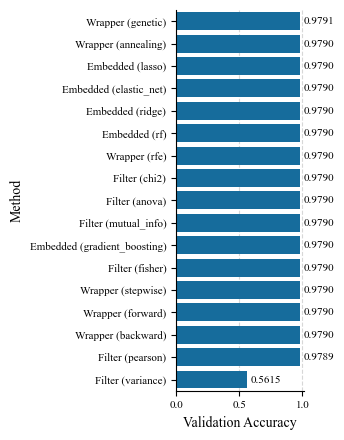


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (genetic)']
Winner: Wrapper (genetic)
Selected Features (9): ['Max', 'sTtl', 'TotBytes', 'DstBytes', 'Offset', 'DstLoss', 'State', 'TcpRtt', 'AckDat']
[Step 2] Dropping non-selected features...
[Step 3] Running Preprocessing (Scaling/Sampling)...


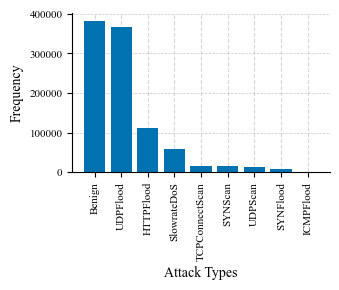


[Preprocessing] Final dataset sizes (after None):
  - Training samples: 972695
  - Validation samples: 121587
  - Test samples: 121587
[Step 4] Saving processed dataframes to ../data frames/main/RF/35 features...
COMPLETED: 35 features pipeline finished.


STARTING PIPELINE: 30 FEATURES
[Setup] Created directory: ../data frames/main/RF/30 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 30 features...
[Filter] Completed in 0.16 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'State', 'SrcWin', 'TcpRtt', 'AckDat']
   -> Validation Accuracy: 0.9

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


[Embedded] Completed in 76.74 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: ridge ---

[Embedded] Starting RIDGE Feature Selection to select top 30 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 115.58 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'pLoss', 'DstRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9789

--- Embedded Method: elastic_net ---

[Embedded] Starting ELASTIC_NET Feature Selection to select top 30 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 78.99 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: rf ---

[Embedded] Starting RF Feature Selection to select top 30 features...
[Embedded] Completed in 9.91 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Rate', 'SrcRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: gradient_boosting ---

[Embedded] Starting GRADIENT_BOOSTING Feature Selection to select 

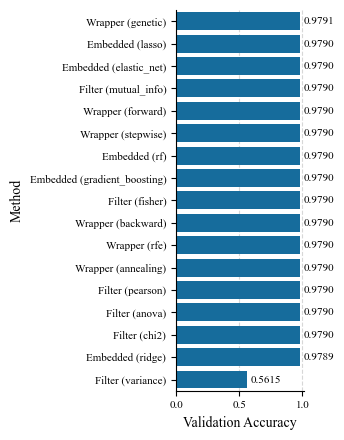


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (genetic)']
Winner: Wrapper (genetic)
Selected Features (9): ['Max', 'sTtl', 'TotBytes', 'DstBytes', 'Offset', 'DstLoss', 'State', 'TcpRtt', 'AckDat']
[Step 2] Dropping non-selected features...
[Step 3] Running Preprocessing (Scaling/Sampling)...


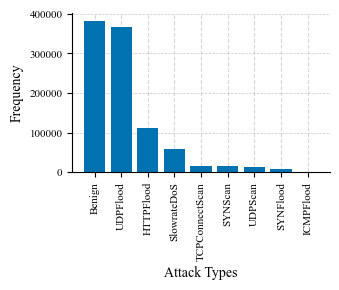


[Preprocessing] Final dataset sizes (after None):
  - Training samples: 972695
  - Validation samples: 121587
  - Test samples: 121587
[Step 4] Saving processed dataframes to ../data frames/main/RF/30 features...
COMPLETED: 30 features pipeline finished.


STARTING PIPELINE: 25 FEATURES
[Setup] Created directory: ../data frames/main/RF/25 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 25 features...
[Filter] Completed in 0.14 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Loss', 'pLoss', 'State', 'SrcWin', 'TcpRtt', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Filter Method: anova ---

[Filter] Starti

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


[Embedded] Completed in 78.11 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'pLoss', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: ridge ---

[Embedded] Starting RIDGE Feature Selection to select top 25 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 114.80 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: elastic_net ---

[Embedded] Starting ELASTIC_NET Feature Selection to select top 25 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 73.78 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'pLoss', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: rf ---

[Embedded] Starting RF Feature Selection to select top 25 features...
[Embedded] Completed in 9.26 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'dDSb', 'sTtl', 'Cause', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'SrcLoad', 'Rate', 'SrcRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9789

--- Embedded Method: gradient_boosting ---

[Embedded] Starting GRADIENT_BOOSTING Feature Selection to select top 25 features...
[Embedded] Completed in 1408.77 seconds.
[Embedded] Selected Features: ['Dur', 'Mean

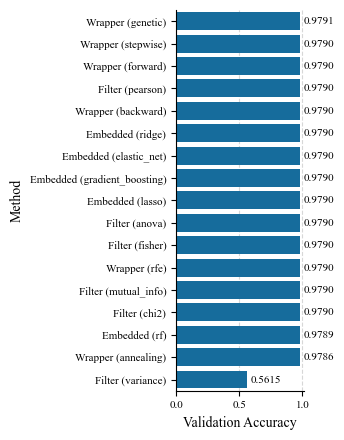


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (genetic)']
Winner: Wrapper (genetic)
Selected Features (9): ['Max', 'sTtl', 'TotBytes', 'DstBytes', 'Offset', 'DstLoss', 'State', 'TcpRtt', 'AckDat']
[Step 2] Dropping non-selected features...
[Step 3] Running Preprocessing (Scaling/Sampling)...


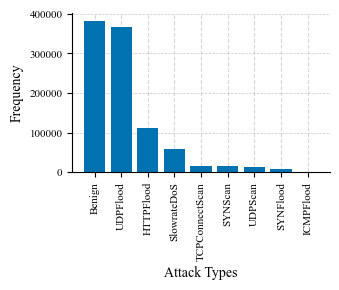


[Preprocessing] Final dataset sizes (after None):
  - Training samples: 972695
  - Validation samples: 121587
  - Test samples: 121587
[Step 4] Saving processed dataframes to ../data frames/main/RF/25 features...
COMPLETED: 25 features pipeline finished.


STARTING PIPELINE: 20 FEATURES
[Setup] Created directory: ../data frames/main/RF/20 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 20 features...
[Filter] Completed in 0.15 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'TotBytes', 'SrcBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'TcpRtt', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Filter Method: anova ---

[Filter] Starting ANOVA Feature Selection to select top 20 fe

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


[Embedded] Completed in 75.03 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: ridge ---

[Embedded] Starting RIDGE Feature Selection to select top 20 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 117.55 seconds.
[Embedded] Selected Features: ['Proto', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9697

--- Embedded Method: elastic_net ---

[Embedded] Starting ELASTIC_NET Feature Selection to select top 20 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 77.88 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: rf ---

[Embedded] Starting RF Feature Selection to select top 20 features...
[Embedded] Completed in 9.67 seconds.
[Embedded] Selected Features: ['Mean', 'Min', 'Max', 'Proto', 'dDSb', 'sTtl', 'Cause', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: gradient_boosting ---

[Embedded] Starting GRADIENT_BOOSTING Feature Selection to select top 20 features...
[Embedded] Completed in 1451.37 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTtl', 'Cause', 'SrcPkts', 'TotBytes', 'SrcBytes', 'DstBytes'

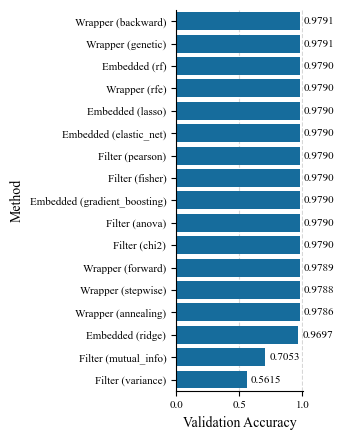


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (backward)']
Winner: Wrapper (backward)
Selected Features (20): ['Max', 'dTos', 'sDSb', 'sTtl', 'dTtl', 'Cause', 'DstPkts', 'TotBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'DstLoad', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcGap', 'DstGap', 'State', 'SrcWin', 'TcpRtt']
[Step 2] Dropping non-selected features...
[Step 3] Running Preprocessing (Scaling/Sampling)...


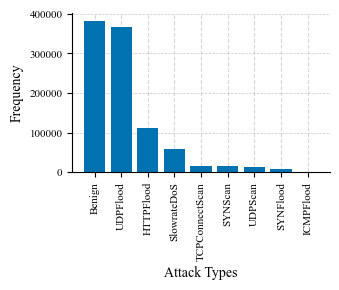


[Preprocessing] Final dataset sizes (after None):
  - Training samples: 972695
  - Validation samples: 121587
  - Test samples: 121587
[Step 4] Saving processed dataframes to ../data frames/main/RF/20 features...
COMPLETED: 20 features pipeline finished.


STARTING PIPELINE: 15 FEATURES
[Setup] Created directory: ../data frames/main/RF/15 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 15 features...
[Filter] Completed in 0.15 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'dDSb', 'sTtl', 'TotPkts', 'TotBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'AckDat']
   -> Validation Accuracy: 0.9789

--- Filter Method: anova ---

[Filter] Starting ANOVA Feature Selection to select top 15 features...
[Filter] Completed in 0.21 seconds.
[Fil

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


[Embedded] Completed in 75.47 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Proto', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'TcpRtt', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: ridge ---

[Embedded] Starting RIDGE Feature Selection to select top 15 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 112.22 seconds.
[Embedded] Selected Features: ['Proto', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'DstPkts', 'TotBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'AckDat']
   -> Validation Accuracy: 0.9696

--- Embedded Method: elastic_net ---

[Embedded] Starting ELASTIC_NET Feature Selection to select top 15 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 76.62 seconds.
[Embedded] Selected Features: ['Dur', 'Mean', 'Sum', 'Proto', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'TcpRtt', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Embedded Method: rf ---

[Embedded] Starting RF Feature Selection to select top 15 features...
[Embedded] Completed in 9.43 seconds.
[Embedded] Selected Features: ['Proto', 'dDSb', 'sTtl', 'Cause', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9696

--- Embedded Method: gradient_boosting ---

[Embedded] Starting GRADIENT_BOOSTING Feature Selection to select top 15 features...
[Embedded] Completed in 4308.32 seconds.
[Embedded] Selected Features: ['Dur', 'Min', 'Max', 'Proto', 'sTtl', 'Cause', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'State', 'SrcWin', 'DstWin', 'AckDat']
   -> Validation Accuracy: 0.9790

Summary of Val

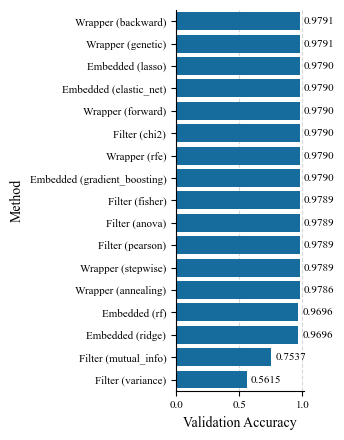


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (backward)']
Winner: Wrapper (backward)
Selected Features (15): ['Max', 'dTos', 'sDSb', 'sTtl', 'dTtl', 'TotBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'DstLoad', 'SrcLoss', 'DstLoss', 'State', 'SrcWin', 'TcpRtt']
[Step 2] Dropping non-selected features...
[Step 3] Running Preprocessing (Scaling/Sampling)...


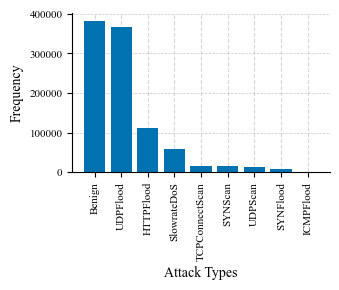


[Preprocessing] Final dataset sizes (after None):
  - Training samples: 972695
  - Validation samples: 121587
  - Test samples: 121587
[Step 4] Saving processed dataframes to ../data frames/main/RF/15 features...
COMPLETED: 15 features pipeline finished.


STARTING PIPELINE: 10 FEATURES
[Setup] Created directory: ../data frames/main/RF/10 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 10 features...
[Filter] Completed in 0.15 seconds.
[Filter] Selected Features: ['Min', 'Max', 'Proto', 'dDSb', 'sTtl', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'State', 'AckDat']
   -> Validation Accuracy: 0.9790

--- Filter Method: anova ---

[Filter] Starting ANOVA Feature Selection to select top 10 features...
[Filter] Completed in 0.18 seconds.
[Filter] Selected Features: ['Min', 'Max', 'Proto

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


[Embedded] Completed in 76.37 seconds.
[Embedded] Selected Features: ['Proto', 'sDSb', 'dDSb', 'sTtl', 'Cause', 'Offset', 'dMeanPktSz', 'State', 'TcpRtt', 'AckDat']
   -> Validation Accuracy: 0.9380

--- Embedded Method: ridge ---

[Embedded] Starting RIDGE Feature Selection to select top 10 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 116.62 seconds.
[Embedded] Selected Features: ['Proto', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'DstPkts', 'DstBytes', 'Offset', 'sMeanPktSz']
   -> Validation Accuracy: 0.9402

--- Embedded Method: elastic_net ---

[Embedded] Starting ELASTIC_NET Feature Selection to select top 10 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


[Embedded] Completed in 83.89 seconds.
[Embedded] Selected Features: ['Proto', 'sDSb', 'dDSb', 'sTtl', 'Cause', 'Offset', 'dMeanPktSz', 'State', 'TcpRtt', 'AckDat']
   -> Validation Accuracy: 0.9380

--- Embedded Method: rf ---

[Embedded] Starting RF Feature Selection to select top 10 features...
[Embedded] Completed in 11.11 seconds.
[Embedded] Selected Features: ['Proto', 'dDSb', 'sTtl', 'Offset', 'sMeanPktSz', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9409

--- Embedded Method: gradient_boosting ---

[Embedded] Starting GRADIENT_BOOSTING Feature Selection to select top 10 features...


In [ ]:
# 1. Loop through each configuration
for n in n_features_list:
    print(f"\n{'='*80}")
    print(f"STARTING PIPELINE: {n} FEATURES")
    print(f"{'='*80}")
    
    # --- A. Setup Version and Directory ---
    version = f"{n}F"
    save_dir = os.path.join('..', 'data frames', 'main', 'RF', f'{n} features')
    
    # Create the directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        print(f"[Setup] Created directory: {save_dir}")
    else:
        print(f"[Setup] Directory exists: {save_dir}")

    # --- B. Perform Feature Selection ---
    # We pass the ORIGINAL full datasets (X_train, etc.)
    print(f"[Step 1] Running Voting Feature Selection...")
    selected_features, comparison_results = perform_voting_feature_selection(
        X_train, y_train, X_val, y_val, 
        n_features=n, 
        sample_size=None, 
        file_path=preprocessing_dir, # Keeps selection plots in the main preprocessing folder
        version=version
    )
    
    # Save the list of selected features to a text file
    with open(os.path.join(save_dir, f'selected_features_{version}.txt'), 'w') as f:
        f.write('\n'.join(selected_features))

    # --- C. Subset the Data ---
    # CRITICAL: We create COPIES (sub) instead of overwriting X_train.
    # This preserves the original X_train for the next iteration of the loop.
    print(f"[Step 2] Dropping non-selected features...")
    X_train_sub = X_train[selected_features].copy()
    X_val_sub = X_val[selected_features].copy()
    X_test_sub = X_test[selected_features].copy()

    # --- D. Run Preprocessing ---
    # We pass the subsetted data and the 'save_dir' (so preprocessing plots go to the correct folder)
    print(f"[Step 3] Running Preprocessing (Scaling/Sampling)...")
    X_train_proc, X_val_proc, X_test_proc, y_train_proc, y_val_proc, y_test_proc = preprocessing(
        X_train_sub, X_val_sub, X_test_sub, 
        y_train, y_val, y_test, 
        output_encoder, 
        save_dir,       # Pass save_dir here so plots (like class dist) save to the specific folder
        version, 
        sampling_method, 
        plot_distributions
    )

    # --- E. Save the Processed Dataframes ---
    print(f"[Step 4] Saving processed dataframes to {save_dir}...")
    
    # Helper to save DataFrame or Numpy array to CSV
    def save_to_csv(data, filename):
        path = os.path.join(save_dir, filename)
        if isinstance(data, pd.DataFrame):
            data.to_csv(path, index=False)
        else:
            # Convert numpy array to DataFrame
            pd.DataFrame(data).to_csv(path, index=False)
            
    save_to_csv(X_train_proc, f'X_train_{version}.csv')
    save_to_csv(X_val_proc, f'X_val_{version}.csv')
    save_to_csv(X_test_proc, f'X_test_{version}.csv')
    save_to_csv(y_train_proc, f'y_train_{version}.csv')
    save_to_csv(y_val_proc, f'y_val_{version}.csv')
    save_to_csv(y_test_proc, f'y_test_{version}.csv')

    # --- F. Save Label Classes ---
    # Saving the classes is crucial for decoding predictions later
    np.save(os.path.join(save_dir, f'label_classes_{version}.npy'), output_encoder.classes_)
    
    print(f"COMPLETED: {n} features pipeline finished.\n")
